# Climate Data Exploration Tutorial

**Goal**: Learn how to work with climate data (NetCDF files) step-by-step.

This notebook is **completely separate** from the main CMM-VAE project.


---
## Part 1: Import Libraries

These are the tools we need to work with climate data:

In [16]:
import numpy as np
import pandas as pd
import xarray as xr  # The main library for climate data
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # For making maps
import cartopy.feature as cfeature


---
## Part 2: Load Z500 Data (Atmospheric Pressure)

**What is Z500?**
- Z = Geopotential height
- 500 = 500 hPa pressure level (~5.5km altitude)
- Shows large-scale atmospheric circulation patterns

**File format**: NetCDF (.nc) - a special format for multi-dimensional scientific data

In [17]:
# Load the Z500 data
z500_file = r'C:\Users\Lenovo\Desktop\CMM-VAE-Morocco\data.nosync\era5_z500_daily_250_atlantic_1940_2022.nc'
z500_data = xr.open_dataset(z500_file)

print("Z500 Data Loaded!")
print("\n" + "="*60)
print("DATA STRUCTURE:")
print("="*60)
print(z500_data)

Z500 Data Loaded!

DATA STRUCTURE:
<xarray.Dataset> Size: 129MB
Dimensions:    (time: 30316, latitude: 28, longitude: 38)
Coordinates:
  * time       (time) datetime64[ns] 243kB 1940-01-01 1940-01-02 ... 2022-12-31
  * latitude   (latitude) float64 224B 20.0 22.5 25.0 27.5 ... 82.5 85.0 87.5
  * longitude  (longitude) float64 304B -50.0 -47.5 -45.0 ... 37.5 40.0 42.5
Data variables:
    z          (time, latitude, longitude) float32 129MB ...


###  Understanding the Output

**Dimensions**:
- `time`: Number of days (30,316 days from 1940-2022)
- `latitude`: Number of latitude points (28 points)
- `longitude`: Number of longitude points (38 points)

**Data variables**:
- `z`: The actual geopotential height values

**Coordinates**:
- `time`: Dates (1940-01-01, 1940-01-02, ...)
- `latitude`: Degrees north (20.0°, 22.5°, 25.0°, ...)
- `longitude`: Degrees east (-50.0°, -47.5°, -45.0°, ...)



In [18]:
# Let's explore the dimensions in detail
print(" DIMENSION DETAILS:")
print("="*60)

print(f"\n1. TIME:")
print(f"   Total days: {len(z500_data.time)}")
print(f"   First date: {z500_data.time.values[0]}")
print(f"   Last date: {z500_data.time.values[-1]}")
print(f"   Example dates: {z500_data.time.values[:5]}")

print(f"\n2. LATITUDE:")
print(f"   Number of points: {len(z500_data.latitude)}")
print(f"   Range: {float(z500_data.latitude.min()):.1f}° to {float(z500_data.latitude.max()):.1f}°")
print(f"   Values: {z500_data.latitude.values}")

print(f"\n3. LONGITUDE:")
print(f"   Number of points: {len(z500_data.longitude)}")
print(f"   Range: {float(z500_data.longitude.min()):.1f}° to {float(z500_data.longitude.max()):.1f}°")
print(f"   Values: {z500_data.longitude.values}")

 DIMENSION DETAILS:

1. TIME:
   Total days: 30316
   First date: 1940-01-01T00:00:00.000000000
   Last date: 2022-12-31T00:00:00.000000000
   Example dates: ['1940-01-01T00:00:00.000000000' '1940-01-02T00:00:00.000000000'
 '1940-01-03T00:00:00.000000000' '1940-01-04T00:00:00.000000000'
 '1940-01-05T00:00:00.000000000']

2. LATITUDE:
   Number of points: 28
   Range: 20.0° to 87.5°
   Values: [20.  22.5 25.  27.5 30.  32.5 35.  37.5 40.  42.5 45.  47.5 50.  52.5
 55.  57.5 60.  62.5 65.  67.5 70.  72.5 75.  77.5 80.  82.5 85.  87.5]

3. LONGITUDE:
   Number of points: 38
   Range: -50.0° to 42.5°
   Values: [-50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5 -30.  -27.5 -25.  -22.5
 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5
  10.   12.5  15.   17.5  20.   22.5  25.   27.5  30.   32.5  35.   37.5
  40.   42.5]


---
## Part 3: Extract and Visualize a Single Day

Let's look at what the atmosphere looked like on a specific day.

In [19]:
# Select a specific date
sample_date = '2020-01-15'

# Extract Z500 for that day
z500_day = z500_data['z'].sel(time=sample_date)

# Convert from m²/s² to meters (divide by gravity)
z500_day_meters = z500_day / 9.80665

print(f" Selected date: {sample_date}")
print(f"\n Data shape: {z500_day_meters.shape}")
print(f"   (This is a 2D map: {z500_day_meters.shape[0]} latitudes × {z500_day_meters.shape[1]} longitudes)")

print(f"\n Statistics:")
print(f"   Minimum: {float(z500_day_meters.min()):.1f} m")
print(f"   Maximum: {float(z500_day_meters.max()):.1f} m")
print(f"   Mean: {float(z500_day_meters.mean()):.1f} m")

 Selected date: 2020-01-15

 Data shape: (28, 38)
   (This is a 2D map: 28 latitudes × 38 longitudes)

 Statistics:
   Minimum: 1764.5 m
   Maximum: 5869.7 m
   Mean: 5205.1 m


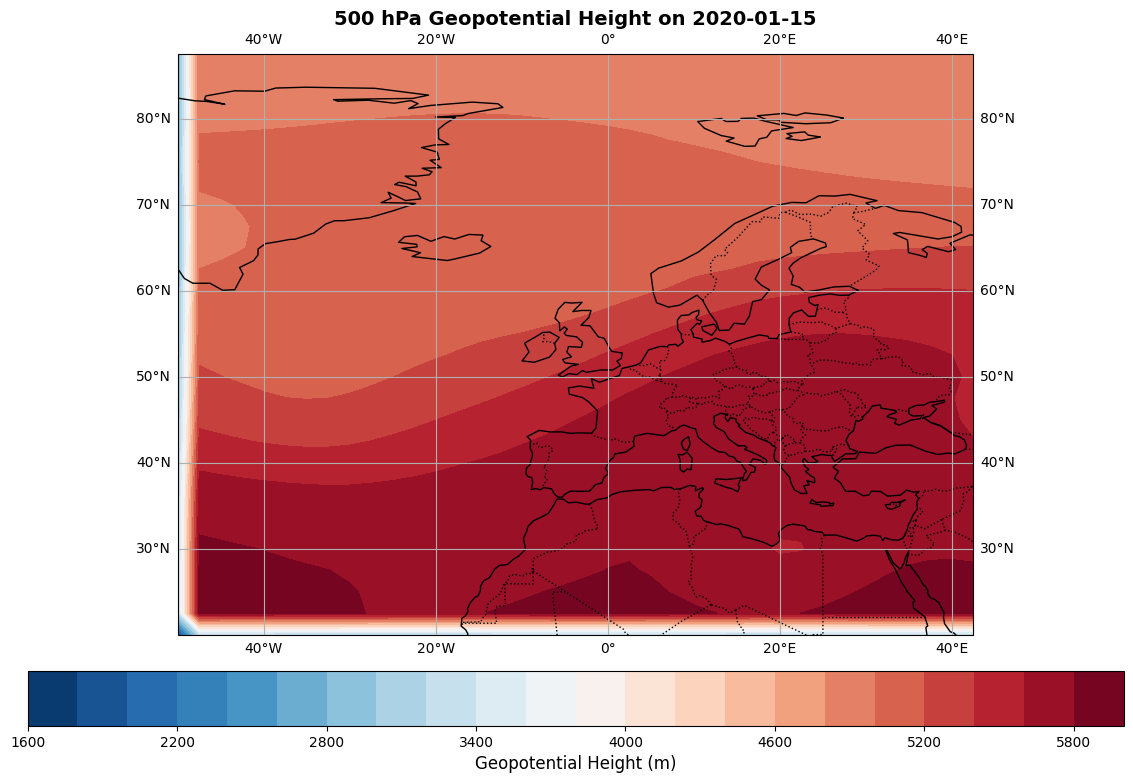


 How to read this map:
   🔴 RED = HIGH pressure (anticyclone) → Clear, dry weather
   🔵 BLUE = LOW pressure (cyclone) → Stormy, rainy weather


In [20]:
# Visualize the map
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = ax.contourf(z500_day_meters.longitude, z500_day_meters.latitude, z500_day_meters,
                 levels=20, cmap='RdBu_r', transform=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('Geopotential Height (m)', fontsize=12)

# Title
ax.set_title(f'500 hPa Geopotential Height on {sample_date}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n How to read this map:")
print("   🔴 RED = HIGH pressure (anticyclone) → Clear, dry weather")
print("   🔵 BLUE = LOW pressure (cyclone) → Stormy, rainy weather")

---
## Part 4: Load Precipitation Data

Now let's load the rainfall data for Morocco.

In [21]:
# Load precipitation data
pr_file = r'C:\Users\Lenovo\Desktop\CMM-VAE-Morocco\data.nosync\CHIRPS_pr_total_EW.nc'
pr_data = xr.open_dataset(pr_file)

print(" Precipitation Data Loaded!")
print("\n" + "="*60)
print("DATA STRUCTURE:")
print("="*60)
print(pr_data)

 Precipitation Data Loaded!

DATA STRUCTURE:
<xarray.Dataset> Size: 1GB
Dimensions:               (time: 6353, latitude: 166, longitude: 244)
Coordinates:
  * time                  (time) datetime64[ns] 51kB 1981-01-01 ... 2023-01-01
  * latitude              (latitude) float64 1kB 27.67 27.72 ... 35.87 35.92
  * longitude             (longitude) float64 2kB -13.17 -13.12 ... -1.025
Data variables:
    precipitation_amount  (time, latitude, longitude) float32 1GB ...


In [22]:
# Explore precipitation dimensions
print(" PRECIPITATION DIMENSION DETAILS:")
print("="*60)

print(f"\n1. TIME:")
print(f"   Total days: {len(pr_data.time)}")
print(f"   First date: {pr_data.time.values[0]}")
print(f"   Last date: {pr_data.time.values[-1]}")

print(f"\n2. LATITUDE (Morocco region):")
print(f"   Number of points: {len(pr_data.latitude)}")
print(f"   Range: {float(pr_data.latitude.min()):.2f}° to {float(pr_data.latitude.max()):.2f}°")

print(f"\n3. LONGITUDE (Morocco region):")
print(f"   Number of points: {len(pr_data.longitude)}")
print(f"   Range: {float(pr_data.longitude.min()):.2f}° to {float(pr_data.longitude.max()):.2f}°")

print(f"\n Notice: Precipitation has MUCH higher resolution!")
print(f"   Z500: 28 × 38 = 1,064 grid points (covers North Atlantic)")
print(f"   Precip: {len(pr_data.latitude)} × {len(pr_data.longitude)} = {len(pr_data.latitude) * len(pr_data.longitude):,} grid points (zoomed into Morocco)")

 PRECIPITATION DIMENSION DETAILS:

1. TIME:
   Total days: 6353
   First date: 1981-01-01T00:00:00.000000000
   Last date: 2023-01-01T00:00:00.000000000

2. LATITUDE (Morocco region):
   Number of points: 166
   Range: 27.67° to 35.92°

3. LONGITUDE (Morocco region):
   Number of points: 244
   Range: -13.17° to -1.02°

 Notice: Precipitation has MUCH higher resolution!
   Z500: 28 × 38 = 1,064 grid points (covers North Atlantic)
   Precip: 166 × 244 = 40,504 grid points (zoomed into Morocco)


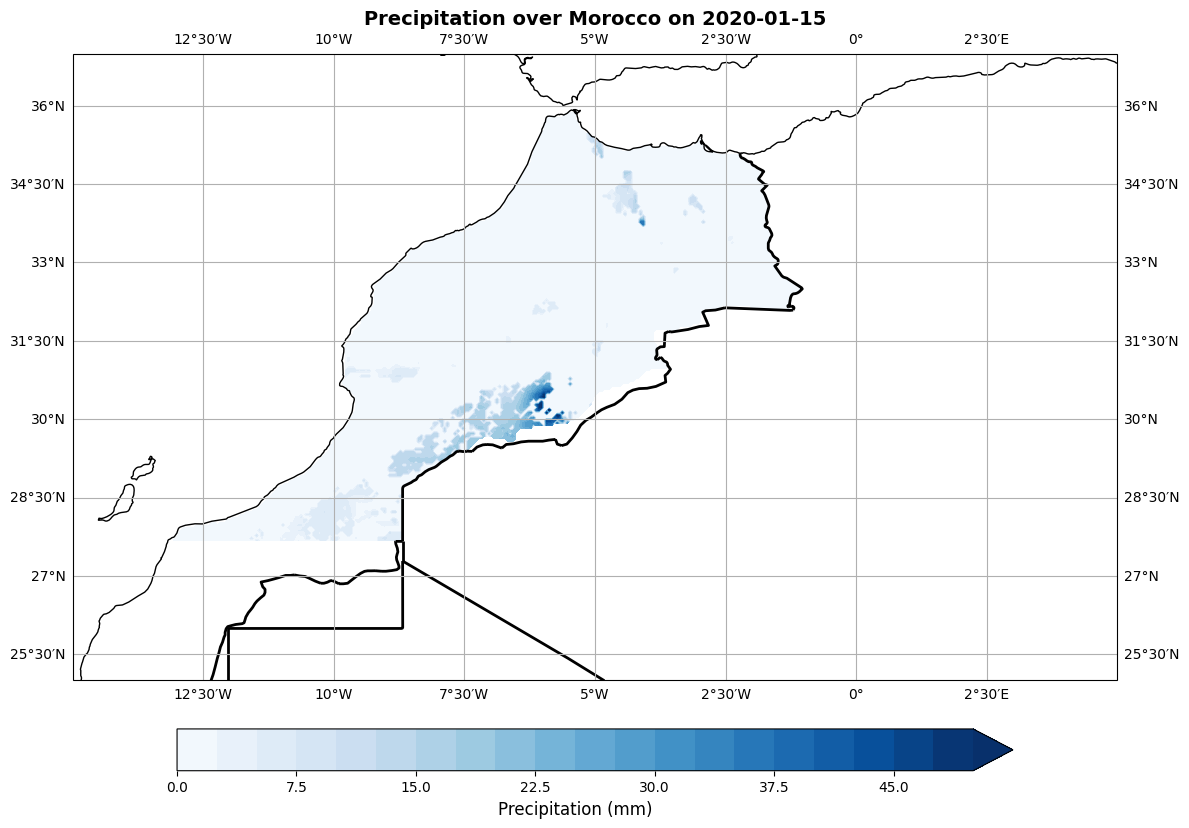


 Precipitation statistics for 2020-01-15:
   Total rainfall: 17165.95 mm (summed over all grid points)
   Maximum: 61.19 mm
   Mean: 1.12 mm


In [23]:
# Visualize precipitation for the same day
pr_day = pr_data['precipitation_amount'].sel(time=sample_date, method='nearest')

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot
im = ax.contourf(pr_day.longitude, pr_day.latitude, pr_day,
                 levels=np.linspace(0, 50, 21), cmap='Blues',
                 transform=ccrs.PlateCarree(), extend='max')

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('Precipitation (mm)', fontsize=12)

# Title
ax.set_title(f'Precipitation over Morocco on {sample_date}', fontsize=14, fontweight='bold')

# Zoom to Morocco
ax.set_extent([-15, 5, 25, 37], crs=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

print(f"\n Precipitation statistics for {sample_date}:")
print(f"   Total rainfall: {float(pr_day.sum()):.2f} mm (summed over all grid points)")
print(f"   Maximum: {float(pr_day.max()):.2f} mm")
print(f"   Mean: {float(pr_day.mean()):.2f} mm")

---
## Part 5: Side-by-Side Comparison

Let's see Z500 and precipitation together to understand the connection.

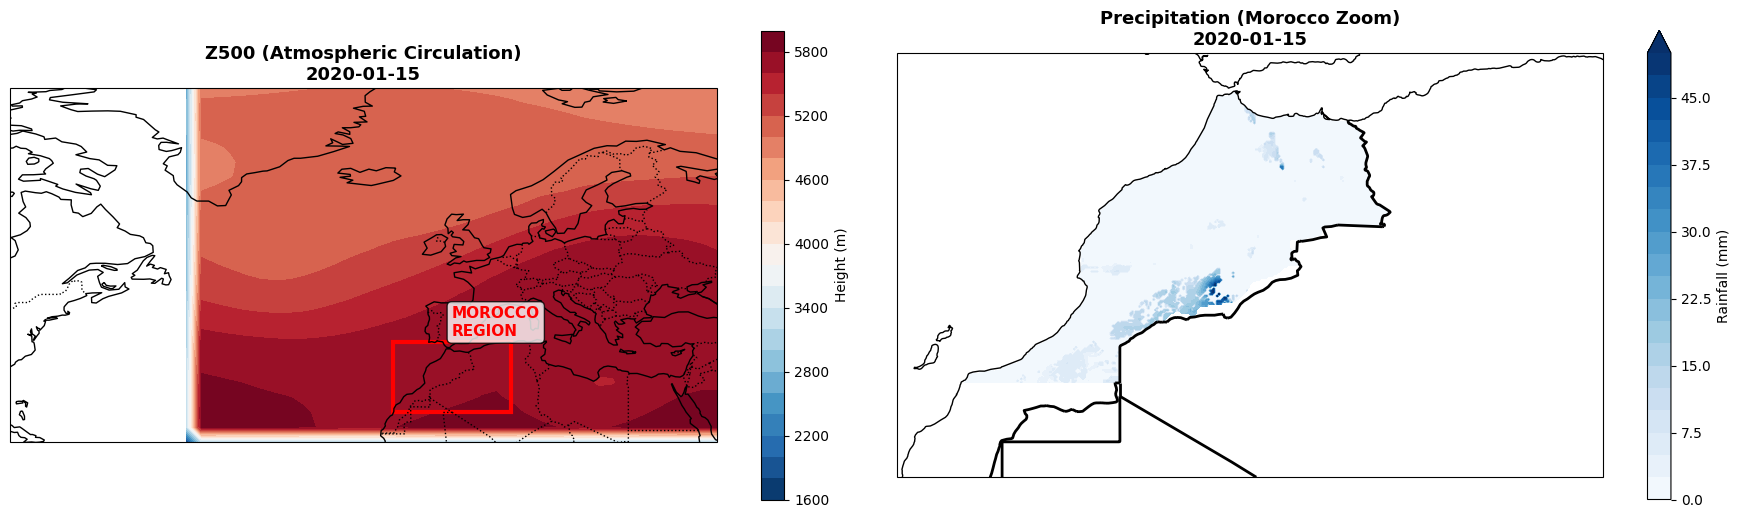


 THE CONNECTION:
   The CMM-VAE model learns to predict the RIGHT map from the LEFT map!
   Input: Z500 pattern → Output: Rainfall prediction


In [24]:
# Create side-by-side plot
fig = plt.figure(figsize=(18, 7))

# Left: Z500
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
im1 = ax1.contourf(z500_day_meters.longitude, z500_day_meters.latitude, z500_day_meters,
                   levels=20, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title(f'Z500 (Atmospheric Circulation)\n{sample_date}', fontsize=13, fontweight='bold')
ax1.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
plt.colorbar(im1, ax=ax1, label='Height (m)', shrink=0.7)

# Add Morocco box
import matplotlib.patches as mpatches
morocco_box = mpatches.Rectangle(xy=(-15, 25), width=20, height=12,
                                 facecolor='none', edgecolor='red', linewidth=3,
                                 transform=ccrs.PlateCarree())
ax1.add_patch(morocco_box)
ax1.text(-5, 38, 'MOROCCO\nREGION', fontsize=11, color='red', weight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Right: Precipitation
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
im2 = ax2.contourf(pr_day.longitude, pr_day.latitude, pr_day,
                   levels=np.linspace(0, 50, 21), cmap='Blues',
                   transform=ccrs.PlateCarree(), extend='max')
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2)
ax2.set_title(f'Precipitation (Morocco Zoom)\n{sample_date}', fontsize=13, fontweight='bold')
ax2.set_extent([-15, 5, 25, 37], crs=ccrs.PlateCarree())
plt.colorbar(im2, ax=ax2, label='Rainfall (mm)', shrink=0.7)

plt.tight_layout()
plt.show()

print("\n THE CONNECTION:")
print("   The CMM-VAE model learns to predict the RIGHT map from the LEFT map!")
print("   Input: Z500 pattern → Output: Rainfall prediction")

---
## Part 6: Time Series Analysis

Let's see how Z500 and precipitation change over time at a single location.

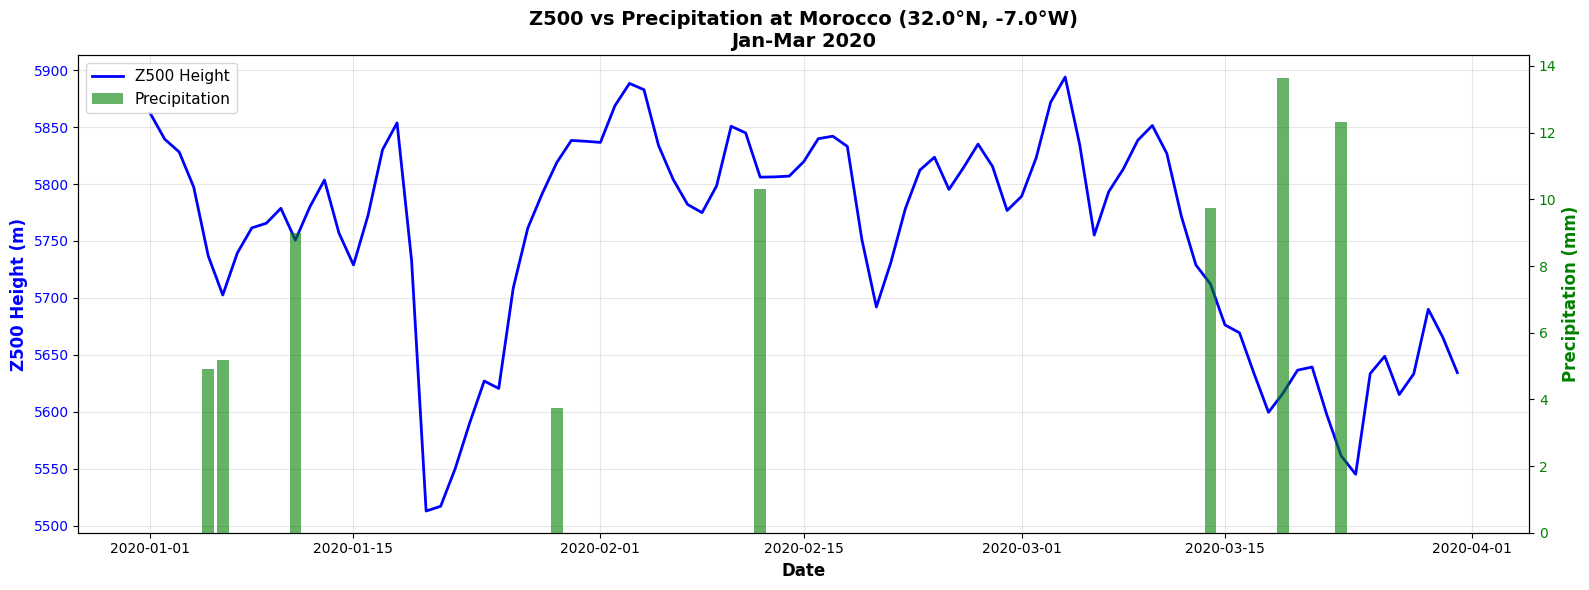


📈 PATTERN TO NOTICE:
   When the BLUE line dips LOW → GREEN bars appear (RAIN!)
   When the BLUE line goes HIGH → No GREEN bars (DRY!)

   This is the relationship the AI model learns!


In [25]:
# Pick a location in Morocco
lat_morocco = 32.0  # Marrakech area
lon_morocco = -7.0

# Extract time series for winter 2020
z500_ts = z500_data['z'].sel(latitude=lat_morocco, longitude=lon_morocco, method='nearest').sel(
    time=slice('2020-01-01', '2020-03-31')) / 9.80665

pr_ts = pr_data['precipitation_amount'].sel(latitude=lat_morocco, longitude=lon_morocco, method='nearest').sel(
    time=slice('2020-01-01', '2020-03-31'))

# Plot
fig, ax1 = plt.subplots(figsize=(16, 6))

# Z500 on left axis
ax1.plot(z500_ts.time, z500_ts, 'b-', linewidth=2, label='Z500 Height')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Z500 Height (m)', fontsize=12, fontweight='bold', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, alpha=0.3)

# Precipitation on right axis
ax2 = ax1.twinx()
ax2.bar(pr_ts.time, pr_ts, color='green', alpha=0.6, width=0.8, label='Precipitation')
ax2.set_ylabel('Precipitation (mm)', fontsize=12, fontweight='bold', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title
plt.title(f'Z500 vs Precipitation at Morocco ({lat_morocco}°N, {lon_morocco}°W)\nJan-Mar 2020',
          fontsize=14, fontweight='bold')

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

print("\n📈 PATTERN TO NOTICE:")
print("   When the BLUE line dips LOW → GREEN bars appear (RAIN!)")
print("   When the BLUE line goes HIGH → No GREEN bars (DRY!)")
print("\n   This is the relationship the AI model learns!")

---
## Part 7: Calculate Anomalies (What the Model Sees)

The model doesn't see raw Z500 values. It sees **anomalies** (deviations from normal).

In [26]:
# Calculate climatology (average for January)
z500_jan = z500_data['z'].sel(time=z500_data.time.dt.month == 1) / 9.80665
z500_climatology = z500_jan.mean(dim='time')

# Calculate anomaly for our sample day
z500_anomaly = z500_day_meters - z500_climatology

print(" ANOMALY CALCULATION:")
print("="*60)
print(f"   Raw Z500 on {sample_date}: {float(z500_day_meters.mean()):.1f} m")
print(f"   January climatology (average): {float(z500_climatology.mean()):.1f} m")
print(f"   Anomaly: {float(z500_anomaly.mean()):.1f} m")
print("\n   Positive anomaly = Higher than usual pressure")
print("   Negative anomaly = Lower than usual pressure")

 ANOMALY CALCULATION:
   Raw Z500 on 2020-01-15: 5205.1 m
   January climatology (average): 5253.0 m
   Anomaly: -47.9 m

   Positive anomaly = Higher than usual pressure
   Negative anomaly = Lower than usual pressure


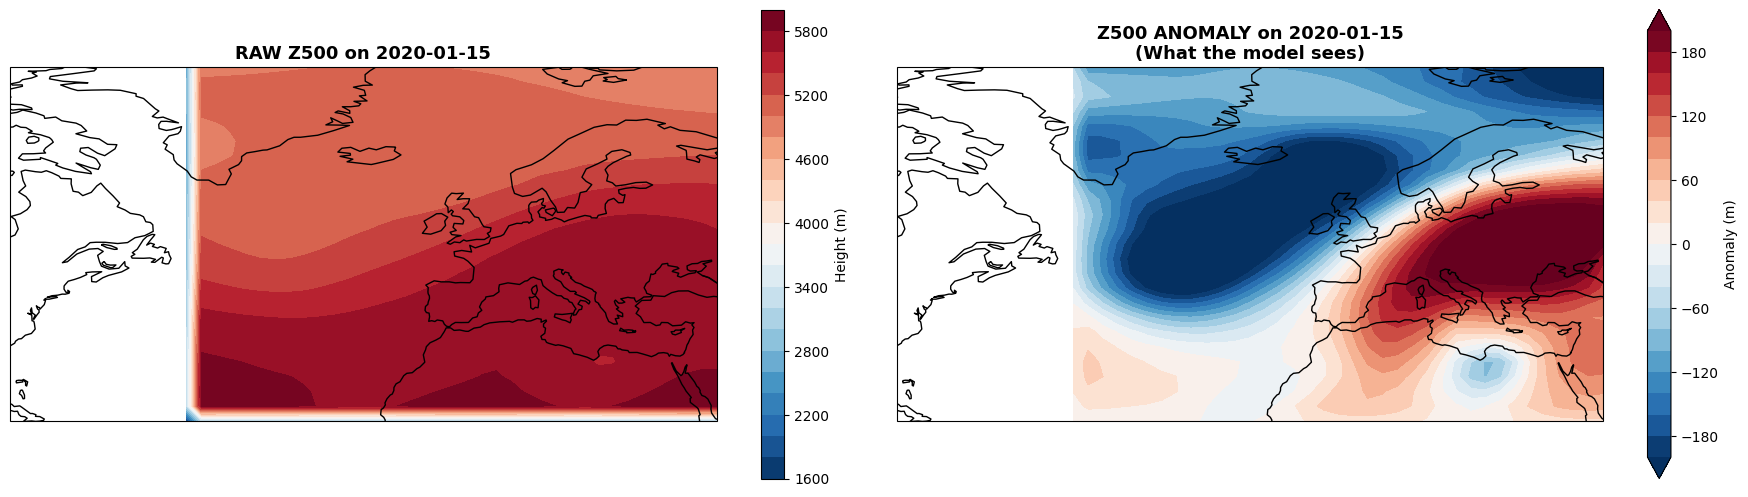


 WHY ANOMALIES?
   1. Removes seasonal cycle (winter vs summer differences)
   2. Highlights unusual patterns that cause extreme weather
   3. Makes the model focus on what's DIFFERENT, not what's NORMAL


In [27]:
# Visualize raw vs anomaly
fig = plt.figure(figsize=(18, 7))

# Left: Raw Z500
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
im1 = ax1.contourf(z500_day_meters.longitude, z500_day_meters.latitude, z500_day_meters,
                   levels=20, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title(f'RAW Z500 on {sample_date}', fontsize=13, fontweight='bold')
ax1.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
plt.colorbar(im1, ax=ax1, label='Height (m)', shrink=0.7)

# Right: Anomaly
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
im2 = ax2.contourf(z500_anomaly.longitude, z500_anomaly.latitude, z500_anomaly,
                   levels=np.linspace(-200, 200, 21), cmap='RdBu_r',
                   transform=ccrs.PlateCarree(), extend='both')
ax2.coastlines()
ax2.set_title(f'Z500 ANOMALY on {sample_date}\n(What the model sees)', fontsize=13, fontweight='bold')
ax2.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
plt.colorbar(im2, ax=ax2, label='Anomaly (m)', shrink=0.7)

plt.tight_layout()
plt.show()

print("\n WHY ANOMALIES?")
print("   1. Removes seasonal cycle (winter vs summer differences)")
print("   2. Highlights unusual patterns that cause extreme weather")
print("   3. Makes the model focus on what's DIFFERENT, not what's NORMAL")

---
## Part 8: How the Data is Combined in CMM-VAE

what the model receives as input.

In [28]:
print(" CMM-VAE MODEL INPUT PIPELINE:")
print("="*60)

# Step 1: Get Z500 anomaly map
print("\nSTEP 1: Z500 Anomaly Map")
print(f"   Shape: {z500_anomaly.shape} (latitude × longitude)")
print(f"   Example values: {z500_anomaly.values.flatten()[:5]}")

# Step 2: Flatten to 1D
z500_flattened = z500_anomaly.values.flatten(order='F')  # Fortran order (column-major)
print("\nSTEP 2: Flatten to 1D Array")
print(f"   Shape: {z500_flattened.shape}")
print(f"   Total numbers: {len(z500_flattened)}")
print(f"   First 10 values: {z500_flattened[:10]}")

# Step 3: Normalize
z500_normalized = (z500_flattened - z500_flattened.mean()) / z500_flattened.std()
print("\nSTEP 3: Normalize (mean=0, std=1)")
print(f"   Mean: {z500_normalized.mean():.6f}")
print(f"   Std: {z500_normalized.std():.6f}")
print(f"   First 10 values: {z500_normalized[:10]}")

# Step 4: Add rainfall label
print("\nSTEP 4: Add Rainfall Cluster Label")
print(f"   Precipitation total: {float(pr_day.sum()):.2f} mm")
print(f"   Assigned to cluster: 2 (example - moderate rainfall pattern)")

print("\n" + "="*60)
print("FINAL MODEL INPUT:")
print("="*60)
print(f"   Input 1 (Z500): Array of {len(z500_normalized)} numbers")
print(f"   Input 2 (Dummy): 1 (always 1, used for cluster centers)")
print(f"   Input 3 (Rainfall label): One-hot encoded [0, 0, 1, 0, 0] (cluster 2)")

print("\n MODEL OUTPUT:")
print("   - Reconstructed Z500 map")
print("   - Cluster probabilities: [0.05, 0.12, 0.68, 0.10, 0.05] (most likely cluster 2)")
print("   - Predicted rainfall pattern: Moderate rain")

 CMM-VAE MODEL INPUT PIPELINE:

STEP 1: Z500 Anomaly Map
   Shape: (28, 38) (latitude × longitude)
   Example values: [2.863037  6.209717  6.965576  6.95459   6.8242188]

STEP 2: Flatten to 1D Array
   Shape: (1064,)
   Total numbers: 1064
   First 10 values: [  2.863037   12.591064   20.60791    26.242676   28.223633   25.608398
  21.871338   13.755127   -1.1479492 -20.470215 ]

STEP 3: Normalize (mean=0, std=1)
   Mean: 0.000000
   Std: 1.000000
   First 10 values: [0.39131856 0.4663254  0.5281384  0.57158464 0.5868586  0.5666941
 0.5378799  0.4753008  0.3603923  0.21141015]

STEP 4: Add Rainfall Cluster Label
   Precipitation total: 17165.95 mm
   Assigned to cluster: 2 (example - moderate rainfall pattern)

FINAL MODEL INPUT:
   Input 1 (Z500): Array of 1064 numbers
   Input 2 (Dummy): 1 (always 1, used for cluster centers)
   Input 3 (Rainfall label): One-hot encoded [0, 0, 1, 0, 0] (cluster 2)

 MODEL OUTPUT:
   - Reconstructed Z500 map
   - Cluster probabilities: [0.05, 0.12, 0.

---
## Part 9: Interactive Exploration

Now it's your turn! Try changing the date and see different weather patterns.

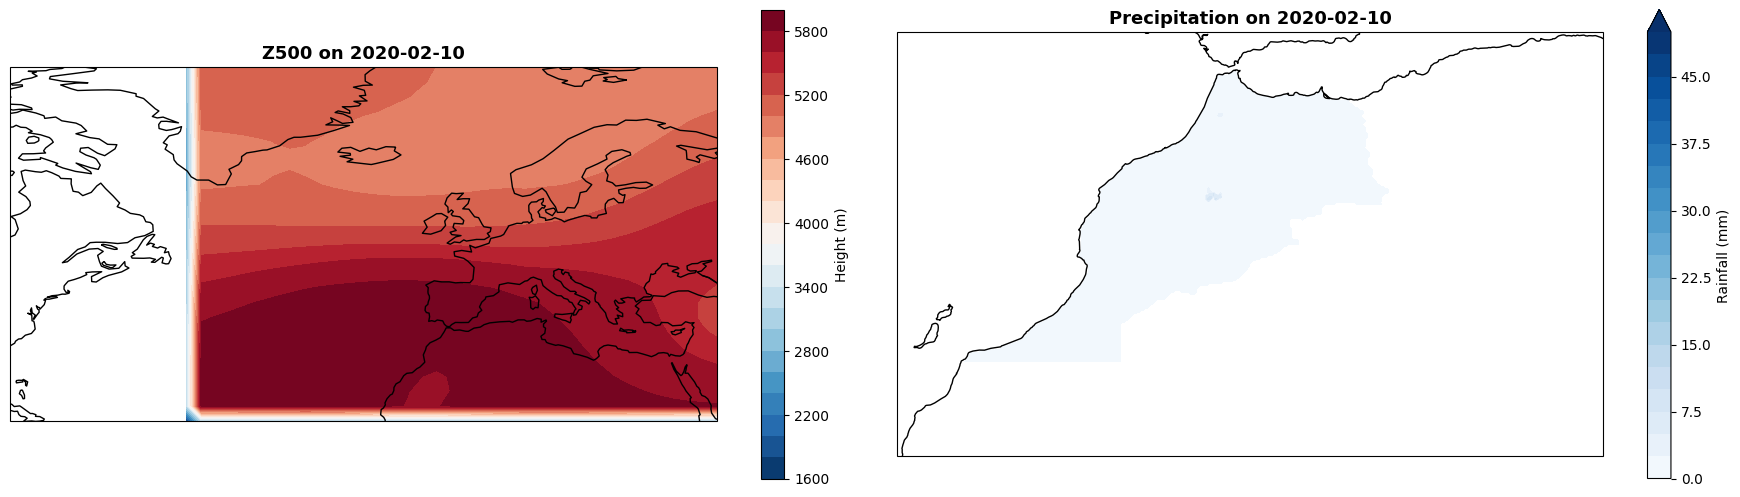


 Stats for 2020-02-10:
   Z500 mean: 5209.0 m
   Total rainfall: 221.22 mm
   Max rainfall: 8.55 mm


In [29]:
# EXPERIMENT HERE: Change the date to explore different days!
explore_date = '2020-02-10'  

# Extract data
z500_explore = z500_data['z'].sel(time=explore_date) / 9.80665
pr_explore = pr_data['precipitation_amount'].sel(time=explore_date, method='nearest')

# Plot
fig = plt.figure(figsize=(18, 7))

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
im1 = ax1.contourf(z500_explore.longitude, z500_explore.latitude, z500_explore,
                   levels=20, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title(f'Z500 on {explore_date}', fontsize=13, fontweight='bold')
ax1.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
plt.colorbar(im1, ax=ax1, label='Height (m)', shrink=0.7)

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
im2 = ax2.contourf(pr_explore.longitude, pr_explore.latitude, pr_explore,
                   levels=np.linspace(0, 50, 21), cmap='Blues',
                   transform=ccrs.PlateCarree(), extend='max')
ax2.coastlines()
ax2.set_title(f'Precipitation on {explore_date}', fontsize=13, fontweight='bold')
ax2.set_extent([-15, 5, 25, 37], crs=ccrs.PlateCarree())
plt.colorbar(im2, ax=ax2, label='Rainfall (mm)', shrink=0.7)

plt.tight_layout()
plt.show()

print(f"\n Stats for {explore_date}:")
print(f"   Z500 mean: {float(z500_explore.mean()):.1f} m")
print(f"   Total rainfall: {float(pr_explore.sum()):.2f} mm")
print(f"   Max rainfall: {float(pr_explore.max()):.2f} mm")

---
## Part 10: Summary - What I Learned

✅ **NetCDF files** store multi-dimensional climate data (time × lat × lon)  
✅ **xarray** is the main library for working with this data  
✅ **Z500** shows atmospheric pressure patterns at 5.5km altitude  
✅ **Precipitation** shows rainfall over Morocco at high resolution  
✅ **Anomalies** highlight unusual patterns (what the model learns from)  
✅ **The model** learns to predict rainfall from Z500 patterns  

